In [ ]:
#Check Python Version
from platform import python_version

print("Python version: " + python_version())

In [ ]:
#Required Modules
pip install --upgrade pip

In [ ]:
pip install --user tensorflow

In [ ]:
pip install --user tflite

In [ ]:
pip install --user tflite-model-maker

In [ ]:
#-----------------------------------------------------------------------------

In [54]:
#Creating a model using tflite_model_maker, I honestly don't know if this is allowed
#Manual model creationg will be below this cell.

from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

# Split Data.
data = DataLoader.from_folder('images/')
train_data, test_data = data.split(0.9)

# Customize the TensorFlow model.
model = image_classifier.create(train_data)

# Evaluate the model.
loss, accuracy = model.evaluate(test_data)

# Export to Tensorflow Lite model and label file in `export_dir`.
model.export(export_dir='tmp/')

INFO:tensorflow:Load image with size: 4317, num_label: 5, labels: daisy, dandelion, rose, sunflower, tulip.


INFO:tensorflow:Load image with size: 4317, num_label: 5, labels: daisy, dandelion, rose, sunflower, tulip.


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


C:\Users\Akbar H Harahap\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


121/121 [==============================] - 59s 475ms/step - loss: 0.8515 - accuracy: 0.7743
Epoch 2/5
121/121 [==============================] - 59s 490ms/step - loss: 0.6620 - accuracy: 0.8908
Epoch 3/5
121/121 [==============================] - 59s 486ms/step - loss: 0.6300 - accuracy: 0.9034
Epoch 4/5
121/121 [==============================] - 60s 494ms/step - loss: 0.6176 - accuracy: 0.9176
Epoch 5/5
14/14 [==============================] - 7s 452ms/step - loss: 0.6318 - accuracy: 0.9028
INFO:tensorflow:Assets written to: C:\Users\AKBARH~1\AppData\Local\Temp\tmpus3kx5y0\assets


INFO:tensorflow:Assets written to: C:\Users\AKBARH~1\AppData\Local\Temp\tmpus3kx5y0\assets
C:\Users\Akbar H Harahap\AppData\Roaming\Python\Python39\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\AKBARH~1\AppData\Local\Temp\tmp_l5ltkm5\labels.txt


INFO:tensorflow:Saving labels in C:\Users\AKBARH~1\AppData\Local\Temp\tmp_l5ltkm5\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: tmp/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: tmp/model.tflite


In [46]:
#-----------------------------------------------------------------------------

In [47]:
#Manual model creation start from here.

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [24]:
img_height, img_width = 64, 64
batch_size = 20

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "images_data/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    "images_data/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "images_data/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3886 files belonging to 5 classes.
Found 217 files belonging to 5 classes.
Found 214 files belonging to 5 classes.


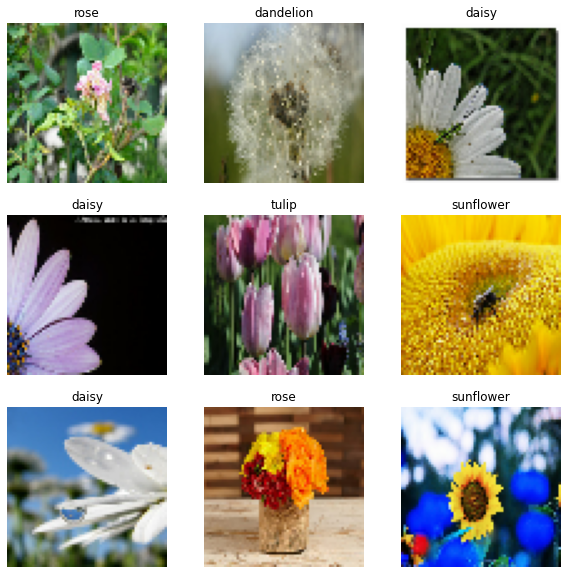

In [25]:
class_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(5)
])

In [42]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [43]:
model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 20
)

Epoch 1/20
195/195 [==============================] - 29s 146ms/step - loss: 1.3988 - accuracy: 0.3603 - val_loss: 1.2504 - val_accuracy: 0.4931
Epoch 2/20
195/195 [==============================] - 29s 146ms/step - loss: 1.1056 - accuracy: 0.5409 - val_loss: 1.1310 - val_accuracy: 0.5392
Epoch 3/20
195/195 [==============================] - 28s 145ms/step - loss: 0.9908 - accuracy: 0.6034 - val_loss: 1.0475 - val_accuracy: 0.5668
Epoch 4/20
195/195 [==============================] - 28s 145ms/step - loss: 0.9020 - accuracy: 0.6462 - val_loss: 1.0279 - val_accuracy: 0.5853
Epoch 5/20
195/195 [==============================] - 28s 146ms/step - loss: 0.8333 - accuracy: 0.6740 - val_loss: 1.0592 - val_accuracy: 0.5899
Epoch 6/20
195/195 [==============================] - 28s 145ms/step - loss: 0.8006 - accuracy: 0.6835 - val_loss: 1.0212 - val_accuracy: 0.6267
Epoch 7/20
195/195 [==============================] - 28s 145ms/step - loss: 0.7284 - accuracy: 0.7213 - val_loss: 1.0143 - val_ac

In [44]:
model.evaluate(test_dataset)

11/11 [==============================] - 0s 32ms/step - loss: 1.3045 - accuracy: 0.6776


[1.304495930671692, 0.677570104598999]

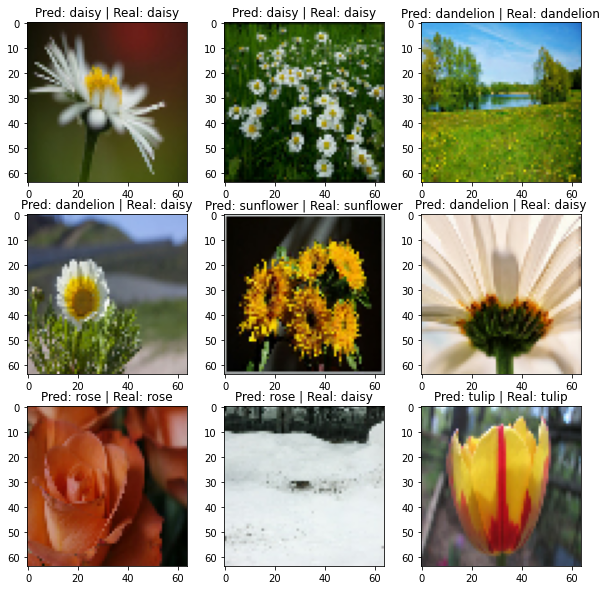

In [51]:
#Show images in grid

plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
    classifications = model(images)
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [53]:
#Export Image with TFLite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\AKBARH~1\AppData\Local\Temp\tmp0abdhxyt\assets


INFO:tensorflow:Assets written to: C:\Users\AKBARH~1\AppData\Local\Temp\tmp0abdhxyt\assets
